In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import svm, datasets, metrics, model_selection, preprocessing, pipeline

In [10]:
xlsx = pd.ExcelFile('DATA.xlsx')
df = pd.read_excel(xlsx, 'Sheet1')
dataset= df.copy()
dataset

,pH,Temp,Adsorbent,Ct_time,eff
0,9,328,40,50,98.92
1,7,318,30,20,98.72
2,7,318,50,40,99.78
3,5,308,20,30,80.74
4,7,318,30,40,99.11
5,9,308,40,30,97.99
6,11,318,30,40,99.88
7,5,308,40,50,97.15
8,9,308,20,50,97.52
9,5,328,40,30,71.08


In [ ]:

# convert 3d to 2d
# dataset_pca.pop('PC3')




dataset.pop('index')


dataset

In [ ]:
# import treated data

xlsx_3 = pd.ExcelFile('DATA.xlsx')
df_3 = pd.read_excel(xlsx_3, 'Sheet1')
pca_target= df_3.copy()

pca_target

In [11]:
# scalling
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Sd_scaler1 =scaler1.fit(dataset)
data1_Sd= Sd_scaler1.transform(dataset)
print(data1_Sd)
    
    #convert to dataframe
dataset= pd.DataFrame(data1_Sd, columns=dataset.keys())

[[ 1.08012345e+00  1.08012345e+00  1.08012345e+00  1.09688074e+00
   7.65556425e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.08029105e+00
   7.40360328e-01]
 [ 0.00000000e+00  0.00000000e+00  2.16024690e+00  3.78234737e-02
   8.73899644e-01]
 [-1.08012345e+00 -1.08012345e+00 -1.08012345e+00 -1.02123379e+00
  -1.52476883e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.78234737e-02
   7.89492718e-01]
 [ 1.08012345e+00 -1.08012345e+00  1.08012345e+00 -1.02123379e+00
   6.48394572e-01]
 [ 2.16024690e+00  0.00000000e+00  0.00000000e+00  3.78234737e-02
   8.86497693e-01]
 [-1.08012345e+00 -1.08012345e+00  1.08012345e+00  1.09688074e+00
   5.42570963e-01]
 [ 1.08012345e+00 -1.08012345e+00 -1.08012345e+00  1.09688074e+00
   5.89183743e-01]
 [-1.08012345e+00  1.08012345e+00  1.08012345e+00 -1.02123379e+00
  -2.74174034e+00]
 [-1.08012345e+00  1.08012345e+00 -1.08012345e+00 -1.02123379e+00
  -7.86523178e-01]
 [ 0.00000000e+00 -2.16024690e+00  0.00000000e+00  3.78234737e-02

In [18]:
#scalling II, Minmax
from sklearn.preprocessing import MinMaxScaler

scaler2=MinMaxScaler()
MM_scaler1=scaler2.fit(dataset)
data1_MM=MM_scaler1.transform(dataset)
print(data1_MM)

    #convert to dataframe
dataset= pd.DataFrame(data1_MM, columns=dataset.keys())

[[0.75       0.75       0.75       0.75       0.96666667]
 [0.5        0.5        0.5        0.         0.95972222]
 [0.5        0.5        1.         0.5        0.99652778]
 [0.25       0.25       0.25       0.25       0.33541667]
 [0.5        0.5        0.5        0.5        0.97326389]
 [0.75       0.25       0.75       0.25       0.934375  ]
 [1.         0.5        0.5        0.5        1.        ]
 [0.25       0.25       0.75       0.75       0.90520833]
 [0.75       0.25       0.25       0.75       0.91805556]
 [0.25       0.75       0.75       0.25       0.        ]
 [0.25       0.75       0.25       0.25       0.53888889]
 [0.5        0.         0.5        0.5        0.88090278]
 [0.25       0.75       0.75       0.75       0.96006944]
 [0.75       0.75       0.25       0.75       0.86458333]
 [0.5        0.5        0.5        0.25       0.89930556]
 [0.25       0.75       0.25       0.75       0.25486111]
 [0.5        0.5        0.5        0.5        0.90520833]
 [0.25       0

In [ ]:
# non pcas

xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
df = pd.read_excel(xlsx, '1S 4X')
dataset1= df.copy()




from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Sd_scaler1 =scaler1.fit(dataset1)
data1_Sd= Sd_scaler1.transform(dataset1)
print(data1_Sd)
    
    #convert to dataframe
dataset= pd.DataFrame(data1_Sd, columns=dataset1.keys())

# dropping columns
# droppies= ['SFL' , 'NPHI', 'LLS', 'LLD']
# dataset.drop(droppies, inplace=True, axis=1)

# split datat into input and target

inputs = dataset.copy()

target = inputs.pop('RHOB')


train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target, train_size=0.7, shuffle=True)

print('train samples:', len(train_input))
print('test samples', len(test_input))


In [19]:
inputs = dataset.copy()

target = inputs.pop('eff')


train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target, train_size=0.8, shuffle=True)

print('train samples:', len(train_input))
print('test samples', len(test_input))


train samples: 22
test samples 6


In [20]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [5,1, 0.1,0.5,0.6, 0.01, 0.001, 0.0001],
#               'kernel': [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’]
             }

svc = svm.SVR()
model_cv = GridSearchCV(svc, param_grid)

model_cv.fit(train_input, train_target)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [5, 1, 0.1, 0.5, 0.6, 0.01, 0.001, 0.0001]})

In [21]:
# model.cv_results_

model_cv.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
# sorted(model.cv_results_.keys())

In [22]:
model = pipeline.make_pipeline(
#     preprocessing.StandardScaler(),
    svm.SVR(C=1,
#             epsilon=0.2
            gamma= 0.1
           ))
model.fit(train_input, train_target,
#                         early_stopping_rounds=10,
         
         )




Pipeline(steps=[('svr', SVR(C=1, gamma=0.1))])

Text(0, 0.5, 'Predicted')

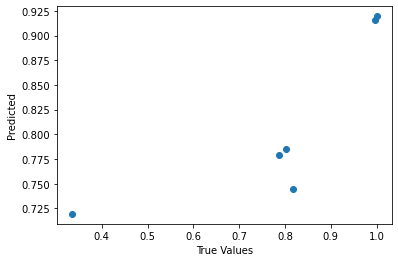

In [23]:
predicted = model.predict(test_input)

fig, ax = plt.subplots()
ax.scatter(test_target, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')


In [24]:
print("r2 score: {}".format(metrics.r2_score( test_target, predicted)))
print("mse: {}".format(metrics.mean_squared_error( test_target, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(test_target, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

r2 score: 0.4354744617235444
mse: 0.027692859810879603
rmse: 0.16641171776915112
mae: 0.10694748195967735


# TEST ON DIFFERENT WELLS

In [ ]:
# Feat_extracts well3
def predictme(well_name):
    xlsx_2 = pd.ExcelFile(well_name)
    df_2 = pd.read_excel(xlsx_2, 'PCAs')
    dataset_pca_2= df_2.copy()


    dataset_pca_2.pop('PC3')
    dataset_pca_2.pop('index')

    dataset_pca_2


    xlsx_2y = pd.ExcelFile(well_name)
    df_2y = pd.read_excel(xlsx_2y, 'target')
    pca_target_2y= df_2y.copy()

    # pca_target_2y.pop('RHOB')
    pca_target_2y



    predicted_2y = model.predict(dataset_pca_2)

    fig, ax = plt.subplots()
    ax.scatter(pca_target_2y, predicted_2y, alpha=0.5)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted')


    print("r2 score: {}".format(metrics.r2_score(pca_target_2y, predicted_2y)))
    print("mse: {}".format(metrics.mean_squared_error(pca_target_2y, predicted_2y)))
    print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(pca_target_2y, predicted_2y))))
    print("mae: {}".format(metrics.mean_absolute_error(pca_target_2y, predicted_2y)))
    
    return 

predictme("Feat_extracts well4.xlsx")

In [ ]:
# Feat_extracts well3


def predictme(wellname):
    
    xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
    df = pd.read_excel(xlsx, wellname)
    dataset= df.copy()

    def standardizme(dataset, outname):
        from sklearn.preprocessing import StandardScaler
        scaler1 = StandardScaler()
        Sd_scaler1 =scaler1.fit(dataset)
        data1_Sd= Sd_scaler1.transform(dataset)
        print(data1_Sd)

        #convert to dataframe
        outname= pd.DataFrame(data1_Sd, columns=dataset.keys())

        return outname

    standardizme(dataset,dataset)


    # split datat into input and target

    inputs2 = dataset.copy()
    target = inputs2.pop('RHOB')


    predicted = model.predict(inputs2)

    fig, ax = plt.subplots()
    ax.scatter(target, predicted, alpha=0.5)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted')


    print("r2 score: {}".format(metrics.r2_score(target, predicted)))
    print("mse: {}".format(metrics.mean_squared_error(target, predicted)))
    print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(target, predicted))))
    print("mae: {}".format(metrics.mean_absolute_error(target, predicted)))
    
    return 

predictme('1S 3X')
# predictme("Feat_extracts well4.xlsx")

In [ ]:
# Feat_extracts well3


def predictme(wellname):
    
    xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
    df = pd.read_excel(xlsx, wellname)
    dataset_ext= df.copy()


    from sklearn.preprocessing import StandardScaler
    scaler1 = StandardScaler()
    Sd_scaler1 =scaler1.fit(dataset_ext)
    data1_Sd= Sd_scaler1.transform(dataset_ext)
    # print(data1_Sd)

            #convert to dataframe
    dataset= pd.DataFrame(data1_Sd, columns=dataset_ext.keys())
    
    # dropping columns
    droppies= ['SFL' , 'NPHI', 'LLS', 'LLD']
    dataset.drop(droppies, inplace=True, axis=1)

#     print(dataset)
    # split datat into input and target

    inputs2 = dataset.copy()
    target = inputs2.pop('RHOB')


    predicted = model.predict(inputs2)

    fig, ax = plt.subplots()
    ax.scatter(target, predicted, alpha=0.5)

    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted')


    print("r2 score: {}".format(metrics.r2_score(target, predicted)))
    print("mse: {}".format(metrics.mean_squared_error(target, predicted)))
    print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(target, predicted))))
    print("mae: {}".format(metrics.mean_absolute_error(target, predicted)))
    
    return 

predictme('1S 1X')
# predictme("Feat_extracts well4.xlsx")